In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, ifftshift, fftshift

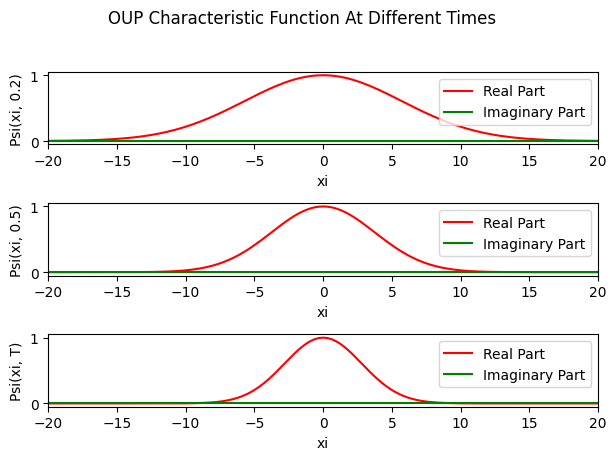

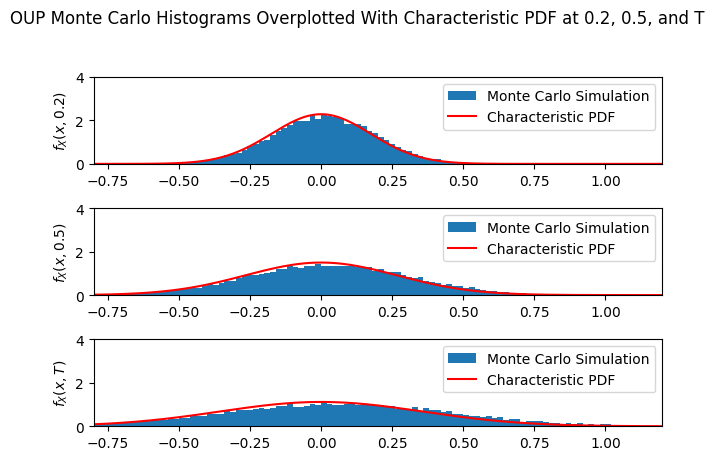

In [2]:
# -- OUP Parameters -----
# Define OUP Model Parameters
theta = 0.2
kappa = 0.3
sigma = 0.4
x0 = 0  # Initial value

# -- OU MONTE CARLO SECTION -----
# Define parameters and time grid
npaths = 20000  # Number of paths
T = 1  # Time horizon
nsteps = 200  # Number of time steps
dt = T / nsteps  # Time step
t = np.linspace(0, T, nsteps+1)  # Observation times

# Initialize the X variable
X = np.zeros((nsteps + 1, npaths))
X[0, :] = x0

# Compute the increments of the OU process
dX = theta * (kappa - X[:-1, :]) * dt + sigma * \
    np.sqrt(dt) * np.random.randn(nsteps, npaths)

# Accumulate the increments to get the sample paths
X[1:, :] = X[0, :] + np.cumsum(dX, axis=0)

# -- FOURIER TRANSFORMATION SECTION -----
# -- Transformation Parameters --
N = 2048  # Grid size
Dx = 0.01  # Grid step in real space
Lx = N * Dx  # Upper truncation limit in real space
Dxi = 2 * np.pi / Lx  # Grid step in Fourier space
Lxi = N * Dxi  # Upper truncation limit in Fourier space
x = Dx * np.arange(-N/2, N/2)  # Grid in real space
xi = Dxi * np.arange(-N/2, N/2)  # Grid in Fourier space

# Characteristic function - using parameters of the OU process
# Define the characteristic function for the Ornstein-Uhlenbeck process
def Fa(t):
    a = kappa * theta - kappa  # given relationship
    phi = np.exp(1j * x0 * xi * np.exp(a * t) - (sigma**2 * (np.exp(2 * a * t) - 1) * xi**2) / (4 * a))
    return phi


# -- Visualisation of Real And Imaginary Characteristic function at 0.2, 0.5 and T -----
# Characteristic Function at different points
Fa_point2 = Fa(0.2)  # Characteristic Function at 0.2
Fa_point5 = Fa(0.5)  # Characteristic Function at 0.5
Fa_T = Fa(T)  # Characteristic Function at T

plt.suptitle('OUP Characteristic Function At Different Times')

# Plot at 0.2 - Characteristic Function
plt.figure(1)
plt.subplot(3, 1, 1)
plt.plot(xi, np.real(Fa_point2), 'r', label='Real Part')
plt.plot(xi, np.imag(Fa_point2), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, 0.2)')
plt.legend(loc='upper right')

# Plot at 0.5 - Characteristic Function
plt.subplot(3, 1, 2)
plt.plot(xi, np.real(Fa_point5), 'r', label='Real Part')
plt.plot(xi, np.imag(Fa_point5), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, 0.5)')
plt.legend(loc='upper right')

# Plot at T - Characteristic Function
plt.subplot(3, 1, 3)
plt.plot(xi, np.real(Fa_T), 'r', label='Real Part')
plt.plot(xi, np.imag(Fa_T), 'g', label='Imaginary Part')
plt.xlabel('xi')
plt.xlim([-20, 20])
plt.ylabel('Psi(xi, T)')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


# Inverse Fourier Transformation to get the function at different points
fn_point2 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa(0.2)))) / Lx  # Function at 0.2
fn_point5 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa(0.5)))) / Lx  # Function at 0.5
fn_1 = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(Fa(1)))) / Lx  # Function at 1

plt.figure(2)
plt.suptitle('OUP Monte Carlo Histograms Overplotted With Characteristic PDF at 0.2, 0.5, and T')

# Plot at 0.2 - real PDF
plt.subplot(3, 1, 1)
plt.hist(X[40, :], bins=np.arange(-0.8, 1.21, 0.02), density=True, label='Monte Carlo Simulation')
plt.plot(x, np.real(fn_point2), 'r', label='Characteristic PDF')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, 0.2)$')
plt.legend()

# Plot at 0.5 - real PDF
plt.subplot(3, 1, 2)
plt.hist(X[100, :], bins=np.arange(-0.8, 1.21, 0.02), density=True, label='Monte Carlo Simulation')
plt.plot(x, np.real(fn_point5), 'r', label='Characteristic PDF')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, 0.5)$')
plt.legend()

# Plot at 1 - real PDF
plt.subplot(3, 1, 3)
plt.hist(X[-1, :], bins=np.arange(-0.8, 1.21, 0.02), density=True, label='Monte Carlo Simulation')
plt.plot(x, np.real(fn_1), 'r', label='Characteristic PDF')
plt.xlim([-0.8, 1.2])
plt.ylim([0, 4])
plt.ylabel('$f_X(x, T)$')
plt.legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
